# **Chapter 3**

## **21. 데이터를 읽어 들이고 확인하자**

In [ ]:
import pandas as pd
uselog = pd.read_csv('use_log.csv')
print(len(uselog))
uselog.head()

197428


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [ ]:
customer = pd.read_csv('customer_master(1).csv')
print(len(customer))
customer.head()

4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [ ]:
class_master = pd.read_csv('class_master.csv')
print(len(class_master))
class_master.head()

3


,class,class_name,price
0,C01,0_종일,10500
1,C02,1_주간,7500
2,C03,2_야간,6000


In [ ]:
campaign_master = pd.read_csv('campaign_master.csv')
print(len(campaign_master))
campaign_master.head()

3


,campaign_id,campaign_name
0,CA1,2_일반
1,CA2,0_입회비반액할인
2,CA3,1_입회비무료


## **22. 고객 데이터를 가공하자**

In [ ]:
# customer에 회원 구분 class_master와 캠페인 구분 campaign_master를 결합
customer_join = pd.merge(customer, class_master, on="class", how="left")
customer_join = pd.merge(customer_join, campaign_master, on="campaign_id", how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반


In [ ]:
print(len(customer))
print(len(customer_join))

4192
4192


In [ ]:
# 결측치 확인
customer_join.isnull().sum()

,0
customer_id,0
name,0
class,0
gender,0
start_date,0
end_date,2842
campaign_id,0
is_deleted,0
class_name,0
price,0


`end_date` 외에는 결측치가 0 : 추가한 `class_name`,`price`, `campaign_name`에는 데이터가 정확하게 들어있음.

## **23. 고객 데이터를 집계하자**

In [ ]:
customer_join.groupby('class_name').count()['customer_id']

,customer_id
class_name,
0_종일,2045
1_주간,1019
2_야간,1128


In [ ]:
customer_join.groupby('campaign_name').count()['customer_id']

,customer_id
campaign_name,
0_입회비반액할인,650
1_입회비무료,492
2_일반,3050


In [ ]:
customer_join.groupby('gender').count()['customer_id']

,customer_id
gender,
F,1983
M,2209


In [ ]:
customer_join.groupby('is_deleted').count()['customer_id']

,customer_id
is_deleted,
0,2842
1,1350


In [ ]:
# start_data가 180401 이후부터 190331까지인 가입 인원을 집계
customer_join['start_date'] = pd.to_datetime(customer_join['start_date'])
customer_start = customer_join.loc[customer_join['start_date'] > pd.to_datetime("20180401")]
# 가입인원 출력
print(len(customer_start))

1361


## **24. 최신 고객 데이터를 집계하자**

In [21]:
# 가장 최근 월의 고객만 추출
customer_join['end_date'] = pd.to_datetime(customer_join['end_date'])
customer_newer = customer_join.loc[(customer_join['end_date'] >= pd.to_datetime("20190331")) | (customer_join['end_date'].isna())]
print(len(customer_newer))
customer_newer['end_date'].unique()

2953


<DatetimeArray>
['NaT', '2019-03-31 00:00:00']
Length: 2, dtype: datetime64[ns]

In [23]:
customer_newer.groupby('class_name').count()['customer_id']

,customer_id
class_name,
0_종일,1444
1_주간,696
2_야간,813


In [24]:
customer_newer.groupby('campaign_name').count()['customer_id']

,customer_id
campaign_name,
0_입회비반액할인,311
1_입회비무료,242
2_일반,2400


In [25]:
customer_newer.groupby('gender').count()['customer_id']

,customer_id
gender,
F,1400
M,1553


## **25. 이용 이력 데이터를 집계하자**

In [26]:
uselog

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01
...,...,...,...
197423,L00000049209753,TS977703,2019-03-31
197424,L00000049209754,TS979550,2019-03-31
197425,L00000049209755,TS995299,2019-03-31
197426,L00000049209756,TS995853,2019-03-31


In [27]:
# 월 이용 횟수의 평균값, 중앙값, 최댓값, 최솟값과 정기적 이용 여부를 플래그로 작성
uselog['usedate'] = pd.to_datetime(uselog['usedate'])
uselog['연월'] = uselog['usedate'].dt.strftime("%Y-%m")
uselog_months = uselog.groupby(['연월', 'customer_id'], as_index=False).count()
uselog_months.rename(columns={'log_id':'count'}, inplace=True)
del uselog_months['usedate']
uselog_months.head()

,연월,customer_id,count
0,2018-04,AS002855,4
1,2018-04,AS009013,2
2,2018-04,AS009373,3
3,2018-04,AS015315,6
4,2018-04,AS015739,7


In [29]:
uselog_customer = uselog_months.groupby('customer_id')['count'].agg(['mean', 'median', 'max', 'min'])
uselog_customer = uselog_customer.reset_index(drop=False)
uselog_customer.head()

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


## **26. 이용 이력 데이터로부터 정기 이용 플래그를 작성하자**

In [30]:
# 고객마다 월/요일별로 집계

# 요일을 숫자로 변환 (0[월] ~ 6[일])
uselog['weekday'] = uselog['usedate'].dt.weekday
# 고객, 연월, 요일별로 log_id를 카운트
uselog_weekday = uselog.groupby(['customer_id', '연월', 'weekday'],
                                as_index=False).count()[['customer_id', '연월', 'weekday', 'log_id']]
uselog_weekday.rename(columns={'log_id':'count'}, inplace=True)
uselog_weekday.head()

,customer_id,연월,weekday,count
0,AS002855,2018-04,5,4
1,AS002855,2018-05,2,1
2,AS002855,2018-05,5,4
3,AS002855,2018-06,5,5
4,AS002855,2018-07,1,1


In [32]:
# 고객별 최댓값 계산
uselog_weekday = uselog_weekday.groupby('customer_id', as_index=False)[['customer_id', 'count']].max()
# 4 이상인 경우에만 플래그 1 설정
uselog_weekday['routine_flg'] = 0
uselog_weekday['routine_flg'] = uselog_weekday['routine_flg'].where(uselog_weekday['count']< 4, 1)
uselog_weekday.head()

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


고객별 최댓값이란, 특정 월, 특정 요일에 가장 많이 이용한 횟수이다.
이 횟수가 4 또는 5인 사람은 적어도 어떤 달의 매주 특정 요일에 정기적으로 방문한 고객이다.

## **27. 고객 데이터와 이용 이력 데이터를 결합하자**

In [33]:
# uselog_customer와 uselog_weekday를 customer_join과 결합
customer_join = pd.merge(customer_join, uselog_customer, on='customer_id', how='left')
customer_join = pd.merge(customer_join, uselog_weekday[['customer_id', 'routine_flg']], on='customer_id', how='left')
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1


In [34]:
# 결측치 확인
customer_join.isnull().sum()

,0
customer_id,0
name,0
class,0
gender,0
start_date,0
end_date,2842
campaign_id,0
is_deleted,0
class_name,0
price,0


`end_date` 이외에는 결측치가 없으므로 결합에 문제가 없다는 것을 확인!

## **28. 회원 기간을 계산하자**

In [38]:
# 기간 계산
# 월 단위로 집계

# 날짜 비교 함수 relativedelta
from dateutil.relativedelta import relativedelta
customer_join['calc_date'] = customer_join[ 'end_date']
customer_join['calc_date'] = customer_join['calc_date'].fillna(pd.to_datetime("20190430"))
customer_join['membership_period'] = 0
for i in range(len(customer_join)):
  delta = relativedelta(customer_join['calc_date'].iloc[i], customer_join['start_date'].iloc[i])
  customer_join['membership_period'].iloc[i] = delta.years*12 + delta.months
customer_join.head()

Streaming output truncated to the last 5000 lines.
<ipython-input-38-a10d38d96eee>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_join['membership_period'].iloc[i] = delta.years*12 + delta.months
<ipython-input-38-a10d38d96eee>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_join['membership_period'].iloc[i] = delta.years*12 + delta.months
<ipython-input-38-a10d38d96eee>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47


## **29. 고객 행동의 각종 통계량을 파악하자**

In [39]:
customer_join[['mean', 'median', 'max','min']].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


* column `mean` 고객의 매월 평균 이용 횟수
* 행에 있는 `mean` 고객의 매월 평균 이용 횟수의 평균

In [40]:
customer_join.groupby("routine_flg")['customer_id'].count()

,customer_id
routine_flg,
0,779
1,3413


정기적으로 이용하는 횟수가 더 많다.

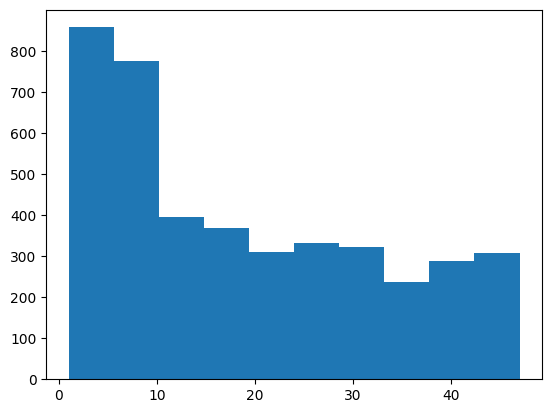

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(customer_join['membership_period'])
plt.show()

## **30. 탈퇴 회원과 지속 회원의 차이를 파악하자**

In [44]:
# 탈퇴 회원과 지속 회원으로 나눠서 비교
customer_end = customer_join.loc[customer_join['is_deleted']==1]
customer_end.describe()

,start_date,end_date,is_deleted,price,mean,median,max,min,routine_flg,calc_date,membership_period
count,1350,1350,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350,1350.000000
mean,2018-01-20 10:45:20,2018-10-17 16:23:28,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,0.456296,2018-10-17 16:23:28,8.026667
min,2016-05-01 00:00:00,2018-04-30 00:00:00,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2018-04-30 00:00:00,1.000000
25%,2017-10-01 00:00:00,2018-06-30 00:00:00,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,0.000000,2018-06-30 00:00:00,4.000000
50%,2018-03-01 00:00:00,2018-10-31 00:00:00,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,0.000000,2018-10-31 00:00:00,7.000000
75%,2018-06-03 00:00:00,2019-01-31 00:00:00,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,1.000000,2019-01-31 00:00:00,11.000000
max,2019-02-11 00:00:00,2019-03-31 00:00:00,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,2019-03-31 00:00:00,23.000000
std,NaN,NaN,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,0.498271,NaN,5.033692


In [46]:
customer_stay = customer_join.loc[customer_join['is_deleted']==0]
customer_stay.describe()

,start_date,end_date,is_deleted,price,mean,median,max,min,routine_flg,calc_date,membership_period
count,2842,0,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842,2842.000000
mean,2017-04-03 22:42:28.627726848,NaT,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,0.984166,2019-04-30 00:00:00,23.970443
min,2015-05-01 00:00:00,NaT,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,2019-04-30 00:00:00,1.000000
25%,2016-05-01 00:00:00,NaT,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,1.000000,2019-04-30 00:00:00,12.000000
50%,2017-04-01 00:00:00,NaT,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,1.000000,2019-04-30 00:00:00,24.000000
75%,2018-04-05 00:00:00,NaT,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,1.000000,2019-04-30 00:00:00,35.000000
max,2019-03-15 00:00:00,NaT,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,2019-04-30 00:00:00,47.000000
std,NaN,NaN,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.124855,NaN,13.746761


In [47]:
customer_join.to_csv('customer_join.csv', index=False)

# **Chapter 4**

## **31. 데이터를 읽어 들이고 확인하자**

In [49]:
import pandas as pd
uselog = pd.read_csv('use_log.csv')
uselog.isnull().sum()
customer = pd.read_csv('customer_join.csv')
# 결측치 확인
customer.isnull().sum()

,0
customer_id,0
name,0
class,0
gender,0
start_date,0
end_date,2842
campaign_id,0
is_deleted,0
class_name,0
price,0


## **32. 클러스터링으로 회원을 그룹화하자**

In [50]:
# customer 데이터를 사용하여 회원 그룹화 진행
customer_clustering = customer[['mean', 'median', 'max', 'min', 'membership_period']]
customer_clustering.head()

,mean,median,max,min,membership_period
0,4.833333,5.0,8,2,47
1,5.083333,5.0,7,3,47
2,4.583333,5.0,6,3,47
3,4.833333,4.5,7,2,47
4,3.916667,4.0,6,1,47


**`k-means`** 변수 간의 거리를 기반으로 그룹화 진행

In [51]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
customer_clustering_sc = sc.fit_transform(customer_clustering)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit(customer_clustering_sc)
customer_clustering['cluster'] = clusters.labels_
print(customer_clustering['cluster'].unique())
customer_clustering.head()

[0 2 3 1]


<ipython-input-51-93d13ba3f656>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_clustering['cluster'] = clusters.labels_


,mean,median,max,min,membership_period,cluster
0,4.833333,5.0,8,2,47,0
1,5.083333,5.0,7,3,47,0
2,4.583333,5.0,6,3,47,0
3,4.833333,4.5,7,2,47,0
4,3.916667,4.0,6,1,47,0


## **33. 클러스터링 결과를 분석하자**

In [52]:
customer_clustering.columns = ['월평균값', '월중앙값', '월최댓값', '월최솟값', '회원기간', 'cluster']
customer_clustering.groupby('cluster').count()

,월평균값,월중앙값,월최댓값,월최솟값,회원기간
cluster,,,,,
0,1249,1249,1249,1249,1249
1,838,838,838,838,838
2,771,771,771,771,771
3,1334,1334,1334,1334,1334


In [53]:
# 그룹 특징 파악을 위한 그룹마다의 평균값 계산
customer_clustering.groupby('cluster').mean()

,월평균값,월중앙값,월최댓값,월최솟값,회원기간
cluster,,,,,
0,4.677561,4.670937,7.233787,2.153723,36.915933
1,8.064079,8.050716,10.014320,6.180191,7.016706
2,3.065504,2.900130,4.783398,1.649805,9.276265
3,5.541974,5.392804,8.757871,2.704648,14.857571


* 그룹2는 회원기간이 짧지만 이용률이 높은 회원.
* 그룹1은 회원기간이 짧고 가장 이용률이 낮은 회원.
* 그룹3과 그룹0은 그룹1과 그룹2보다 회원 기간이 길다.


## **34. 클러스터링 결과를 가시화하자**

In [55]:
# 클러스터링에 사용한 5개 변수를 2차원으로 그리기 위해 차원 축소
# 주성분 분석
from sklearn.decomposition import PCA
X = customer_clustering
# 주성분 분석
pca = PCA(n_components=2)
pca.fit(X)
# 2차원으로 축소한 데이터를 pca_df에 저장
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] = customer_clustering['cluster']

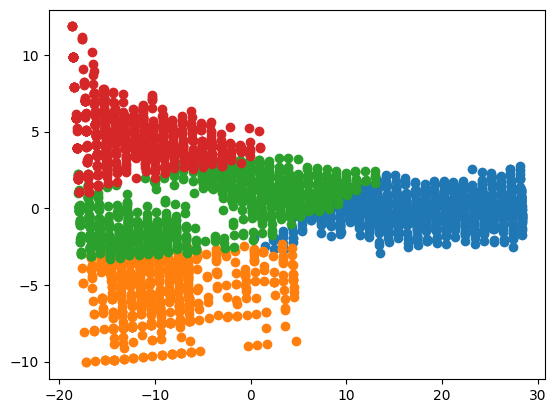

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in customer_clustering['cluster'].unique():
  tmp = pca_df.loc[pca_df['cluster']==i]
  plt.scatter(tmp[0], tmp[1])

정보를 보존한 채 깔끔하게 축소되었음을 확인 가능하다.

## **35. 클러스터링 결과를 바탕으로 탈퇴 회원의 경향을 파악하자**

In [57]:
# customer_clustering에 customer를 결합
customer_clustering = pd.concat([customer_clustering, customer], axis=1)
# cluster, is_deleted별로 customer_id의 개수를 집계
customer_clustering.groupby(['cluster', 'is_deleted'], as_index=False)[['cluster', 'is_deleted']].count()

,cluster,is_deleted
0,1231,1231
1,18,18
2,820,820
3,18,18
4,771,771
5,791,791
6,543,543


`customer_clustering`과 `customer`는 `index`로 연결되어 있기 때문에 `concat()`으로 결합이 가능하다.

In [58]:
# 정기적/비정기적 이용 여부 확인
customer_clustering.groupby(['cluster', 'routine_flg'], as_index=False)[['cluster', 'routine_flg', 'customer_id']].count()

,cluster,routine_flg,customer_id
0,2,2,2
1,1247,1247,1247
2,51,51,51
3,787,787,787
4,499,499,499
5,272,272,272
6,227,227,227
7,1107,1107,1107


## **36. 다음 달의 이용 횟수 예측을 위해 데이터를 준비하자**

In [60]:
# 이용 횟수 예측 모델 구축
# 지도학습의 회귀분석

# strftime으로 연월 칼럼을 작성하고 연월, 고객별로 log_id를 집계
uselog['usedate'] = pd.to_datetime(uselog['usedate'])
uselog['연월'] = uselog['usedate'].dt.strftime("%Y-%m")
uselog_months = uselog.groupby(['연월', 'customer_id'], as_index=False).count()
uselog_months.rename(columns={'log_id':'count'}, inplace=True)
del uselog_months['usedate']
uselog_months.head()

,연월,customer_id,count
0,2018-04,AS002855,4
1,2018-04,AS009013,2
2,2018-04,AS009373,3
3,2018-04,AS015315,6
4,2018-04,AS015739,7


In [63]:
year_months = list(uselog_months['연월'].unique())
predict_data = pd.DataFrame()
for i in range(6, len(year_months)):
  tmp = uselog_months.loc[uselog_months['연월']==year_months[i]]
  tmp.rename(columns={"count" : "count_pred"}, inplace=True)
  for j in range(1, 7):
    tmp_before = uselog_months.loc[uselog_months['연월']==year_months[i-j]]
    del tmp_before['연월']
    tmp_before.rename(columns={'count':'count_{}'.format(j-1)}, inplace=True)
    tmp = pd.merge(tmp, tmp_before, on="customer_id", how='left')
  predict_data = pd.concat([predict_data, tmp], ignore_index=True)
predict_data.head()

<ipython-input-63-09beaf8453b8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.rename(columns={"count" : "count_pred"}, inplace=True)
<ipython-input-63-09beaf8453b8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_before.rename(columns={'count':'count_{}'.format(j-1)}, inplace=True)
<ipython-input-63-09beaf8453b8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_before.rename(columns={'count':'count_{}'.format(j-1)}, inp

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
0,2018-10,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
1,2018-10,AS008805,2,2.0,5.0,7.0,8.0,NaN,NaN
2,2018-10,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
3,2018-10,AS015233,7,9.0,11.0,5.0,7.0,7.0,NaN
4,2018-10,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0


In [64]:
# 결측치 처리
predict_data = predict_data.dropna()
predict_data = predict_data.reset_index(drop=True)
predict_data.head()

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
0,2018-10,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
1,2018-10,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
2,2018-10,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0
3,2018-10,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0
4,2018-10,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0


대상 회원은 6개월 이상 재적 중인 회원이 된다.

## **37. 특징이 되는 변수를 추가하자**

회원 기간은 시계열 변화를 볼 수 있기 때문에, 기본 데이터가 시계열 데이터인 경우 유효할 가능성이 있다.

In [70]:
predict_data

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date_x,start_date_y,now_date
0,2018-10,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01,2016-11-01,2018-10-01
1,2018-10,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01,2015-11-01,2018-10-01
2,2018-10,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01,2015-07-01,2018-10-01
3,2018-10,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01,2017-06-01,2018-10-01
4,2018-10,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01,2017-10-01,2018-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...
15108,2019-03,TS995299,3,3.0,5.0,4.0,5.0,4.0,5.0,2015-09-01,2015-09-01,2019-03-01
15109,2019-03,TS998593,8,7.0,8.0,7.0,9.0,9.0,9.0,2018-09-01,2018-09-01,2019-03-01
15110,2019-03,TS999079,3,2.0,6.0,9.0,6.0,6.0,4.0,2016-06-01,2016-06-01,2019-03-01
15111,2019-03,TS999231,6,6.0,3.0,8.0,5.0,5.0,4.0,2017-03-01,2017-03-01,2019-03-01


In [71]:
customer

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반,8.000000,8.0,8,8,0,2019-04-30,1
4188,HD246549,XXXXX,C01,F,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반,10.000000,10.0,10,10,0,2019-04-30,1
4189,GD037007,XXXXX,C03,M,2019-03-14,NaN,CA1,0,2_야간,6000,2_일반,8.000000,8.0,8,8,0,2019-04-30,1
4190,OA953150,XXXXX,C01,M,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반,11.000000,11.0,11,11,0,2019-04-30,1


In [72]:
# customer의 start_date 칼럼을 predict_data에 결합
predict_data = pd.merge(predict_data, customer[['customer_id', 'start_date']], on='customer_id', how='left')
predict_data.head()

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date_x,start_date_y,now_date,start_date
0,2018-10,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01,2016-11-01,2018-10-01,2016-11-01
1,2018-10,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01,2015-11-01,2018-10-01,2015-11-01
2,2018-10,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01,2015-07-01,2018-10-01,2015-07-01
3,2018-10,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01,2017-06-01,2018-10-01,2017-06-01
4,2018-10,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01,2017-10-01,2018-10-01,2017-10-01


In [74]:
# 연월과 start_date 차이를 이용하여 회원 기간을 월 단위로 작성

# 연월 및 start_date 칼럼을 datetime형으로 변환.
predict_data['now_date'] = pd.to_datetime(predict_data['연월'], format="%Y-%m")
predict_data['start_date'] = pd.to_datetime(predict_data['start_date'])

# relativedelta를 사용하여 회원 기간을 계산
from dateutil.relativedelta import relativedelta
predict_data['period'] = None
for i in range(len(predict_data)):
  delta = relativedelta(predict_data['now_date'][i], predict_data['start_date'][i])
  predict_data['period'][i] = delta.years*12 + delta.months
predict_data.head()

Streaming output truncated to the last 5000 lines.
<ipython-input-74-c9619c99a8da>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data['period'][i] = delta.years*12 + delta.months
<ipython-input-74-c9619c99a8da>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data['period'][i] = delta.years*12 + delta.months
<ipython-input-74-c9619c99a8da>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data['period'][i] 

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date_x,start_date_y,now_date,start_date,period
0,2018-10,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01,2016-11-01,2018-10-01,2016-11-01,23
1,2018-10,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01,2015-11-01,2018-10-01,2015-11-01,35
2,2018-10,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01,2015-07-01,2018-10-01,2015-07-01,39
3,2018-10,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01,2017-06-01,2018-10-01,2017-06-01,16
4,2018-10,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01,2017-10-01,2018-10-01,2017-10-01,12


## **38. 다음 달 이용 횟수를 예측하는 모델을 구축하자**

선형회귀 모델 **`LinearRegression`**

In [100]:
predict_data = predict_data.loc[predict_data['start_date'] >= pd.to_datetime("20180401")]

from sklearn import linear_model
import sklearn.model_selection
model = linear_model.LinearRegression()
X = predict_data[['count_0', 'count_1', 'count_2', 'count_3', 'count_4', 'count_5', 'period']]
y = predict_data['count_pred']

# 학습용 데이터와 평가용 데이터로 나눔
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)
model.fit(X_train, y_train)

LinearRegression()

학습에 이용한 데이터를 완벽히 학습해버리면 미지의 데이터에 대응할 수 없게 되는데, 그 상태를 **과적합**이라고 한다. 따라서, 학습용 데이터로 학습을 진행하고, 모델에게는 미지의 데이터인 평가용 데이터를 제공해 정확도를 검증!

In [101]:
X_train.shape

(1276, 7)

In [102]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.6030683360493712
0.6203816241526259


## **39. 모델에 기여하는 변수를 확인하자**

In [103]:
# 설명 변수마다 기여하는 계수를 출력
coef = pd.DataFrame({'feature_names': X.columns, "coefficient": model.coef_})
coef

,feature_names,coefficient
0,count_0,0.343431
1,count_1,0.190148
2,count_2,0.167145
3,count_3,0.181012
4,count_4,0.065324
5,count_5,0.073876
6,period,0.108296


`count_0`가 가장 크고, 과거로 거슬러 올라갈수록 기여도가 작아지는 경향이 있다. 다시 말해, 이전 달의 이용 횟수가 다음 달의 이용 횟수에 영향을 미치고 있다는 의미.

## **40. 다음 달의 이용 횟수를 예측하자**

In [104]:
x1 = [3, 4, 4, 6, 8, 7, 8]
x2 = [2, 2, 3, 3, 4, 6, 8]
x_pred = [x1, x2]

In [105]:
type(x_pred)

list

In [106]:
import numpy as np

x_pred_array = np.array(x_pred)
type(x_pred_array)
print(x_pred_array.shape)

(2, 7)


In [107]:
model.predict(x_pred_array)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.82725926, 2.05817929])

In [108]:
uselog_months.to_csv('use_log_months.csv', index=False)